# Chapter 8. Jordan Normal Form and Spectrum

## 8.1. Direct sum decomposition

Empty

---
---
## 8.2. Jordan normal form

**Program:** [jordan.py](./8.2/jordan.py)

In [1]:
from sympy import *
from numpy.random import seed, permutation
from functools import reduce

A = diag(1, 2, 2, 2, 2, 3, 3, 3, 3, 3)
A[1, 2] = A[3, 4] = A[5, 6] = A[7, 8] = A[8, 9] = 1

seed(123)
for n in range(10):
    P = permutation(10)
    for i, j in [(P[2 * k], P[2 * k + 1]) for k in range(5)]:
        A[:, j] += A[:, i]
        A[i, :] -= A[j, :]

B = Lambda(S('lmd'), A - S('lmd') * eye(10))
x = Matrix(var('x0, x1, x2, x3, x4, x5, x6, x7, x8, x9'))
y = Matrix(var('y0, y1, y2, y3, y4, y5, y6, y7, y8, y9'))
z = Matrix(var('z0, z1, z2, z3, z4, z5, z6, z7, z8, z9'))

In [2]:
A

Matrix([
[ 35,  28,  24,   6,  26,  16, -6,  14,  26,  42],
[ -5,  -8,  -9, -24, -21,  -2, -5,  -3,  -5, -17],
[ 11,  14,  10,   5,   7,   8,  2,   6,  13,  13],
[  5,   2,   4,   2,   5,   1, -3,   1,   2,   7],
[  1,   4,   4,   6,   8,   0, -1,   2,   0,   5],
[ 19,  11,  14,  19,  25,  13,  6,   7,  16,  31],
[  8,  11,   5,   7,   6,   7,  7,   5,  11,  10],
[  6,  16,  14,  40,  34,   2,  8,   7,   6,  26],
[-27, -19, -16,  -6, -19, -16, -2, -11, -22, -33],
[-20, -21, -19, -11, -22,  -9,  5, -10, -15, -28]])

In [3]:
P = A.charpoly(); P

PurePoly(lambda**10 - 24*lambda**9 + 257*lambda**8 - 1616*lambda**7 + 6603*lambda**6 - 18304*lambda**5 + 34827*lambda**4 - 44856*lambda**3 + 37368*lambda**2 - 18144*lambda + 3888, lambda, domain='ZZ')

In [4]:
factor(P.expr)

(lambda - 3)**5*(lambda - 2)**4*(lambda - 1)

In [5]:
a1 = x.subs(solve(B(1) * x)); a1

Matrix([
[  -x9/3],
[ 5*x9/3],
[    -x9],
[      0],
[  -x9/3],
[ 8*x9/3],
[  -x9/3],
[-8*x9/3],
[  -2*x9],
[     x9]])

In [6]:
a2 = x.subs(solve(B(2) * x)); a2

Matrix([
[        -x8/3 - x9],
[   -5*x8/12 + x9/4],
[ 17*x8/12 - 5*x9/4],
[    -3*x8/4 + x9/4],
[      x8/12 - x9/4],
[-29*x8/12 + 5*x9/4],
[       4*x8/3 - x9],
[     5*x8/6 - x9/2],
[                x8],
[                x9]])

In [7]:
b2 = y.subs(solve(B(2) * y - a2)); b2

Matrix([
[                       2*y7 - 2*y8],
[y6/6 + y7/12 - 17*y8/24 + 11*y9/24],
[5*y6/6 + 5*y7/12 - y8/24 - 5*y9/24],
[  -y6/2 + 5*y7/4 - 9*y8/8 + 3*y9/8],
[           -2*y7 + 7*y8/4 - 5*y9/4],
[            -y6 - 5*y7/2 + y8 - y9],
[                                y6],
[                                y7],
[                                y8],
[                                y9]])

In [8]:
a3 = x.subs(solve(B(3) * x)); a3

Matrix([
[           -2*x9],
[    -x8/3 + x9/3],
[-2*x8/3 + 5*x9/3],
[   x8/3 - 4*x9/3],
[               0],
[             -x8],
[-2*x8/3 + 5*x9/3],
[ 2*x8/3 - 2*x9/3],
[              x8],
[              x9]])

In [9]:
b3 = y.subs(solve(B(3) * y - a3)); b3

Matrix([
[     -y6/2 + y7 - y8 - y9/2],
[                      -y7/2],
[7*y6/6 - y7/3 + y8/3 - y9/2],
[      -2*y6/3 + y7/3 - y8/3],
[  y6/6 - y7/3 + y8/3 - y9/2],
[    -y6/3 - 5*y7/6 - 2*y8/3],
[                         y6],
[                         y7],
[                         y8],
[                         y9]])

In [10]:
c3 = z.subs(solve(B(3) * z - b3)); c3

Matrix([
[-15*z5/11 - 21*z6/22 - 3*z7/22 - 21*z8/11 - z9/2],
[             3*z5/11 + z6/11 - 3*z7/11 + 2*z8/11],
[    -z5/11 + 25*z6/22 - 9*z7/22 + 3*z8/11 - z9/2],
[         -8*z5/11 - 10*z6/11 - 3*z7/11 - 9*z8/11],
[                    z5 + z6/2 + z7/2 + z8 - z9/2],
[                                              z5],
[                                              z6],
[                                              z7],
[                                              z8],
[                                              z9]])

In [11]:
v0 = a1.subs({x9:1})

In [12]:
v1 = b2.subs({y6:1, y7:0, y8:0, y9:0})
v2 = B(2) * v1

In [13]:
v3 = b2.subs({y6:0, y7:1, y8:0, y9:0})
v4 = B(2) * v3

In [14]:
v5 = c3.subs({z5: 1, z6: 0, z7: 0, z8: 0,z9: 0})
v6 = B(3) * v5
v7 = B(3) * v6

In [15]:
v8 = b3.subs({y6: 1, y7: 0, y8: 0, y9: 0})
v9 = B(3) * v8

In [16]:
L = [v0, v1, v2, v3, v4, v5, v6, v7, v8, v9]
V = reduce(lambda x, y: x.row_join(y), L)
V**(-1) * A * V

Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 3, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 3, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 3, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 3]])

In [17]:
L = [v9, v8, v7, v6, v5, v4, v3, v2, v1, v0]
U = reduce(lambda x, y: x.row_join(y), L)
U**(-1) * A * U

Matrix([
[3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 3, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 3, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 2, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

**fig. 8.1  Relation between the eigenspace and generalized eigenspace for eigenvalue 1**

[fig8-1.py](./8.2/fig8-1.py)

![fig8-1.png](./8.2/fig8-1.png)

**fig. 8.2  Relation between the eigenspace and generalized eigenspace for eigenvalue 2**

[fig8-2.py](./8.2/fig8-2.py)

![fig8-2.png](./8.2/fig8-2.png)

**fig. 8.3  Relation between the eigenspace and generalized eigenspace for eigenvalue 3*

[fig8-3.py](./8.2/fig8-3.py)

![fig8-3.png](./8.2/fig8-3.png)


---
**Program:** [jordan2.py](./8.2/jordan2.py)

In [18]:
from sympy import Matrix, diag
from numpy.random import permutation, seed

X = Matrix([[1, 1, 0], [0, 1, 0], [0, 0, 2]])
Y = Matrix([[2, 1, 0], [0, 2, 1], [0, 0, 2]])
Z = Matrix([[2, 1, 0], [0, 2, 0], [0, 0, 2]])

seed(2021)
while True:
    A = X.copy()
    while 0 in A:
        i, j, _  = permutation(3)
        A[:, j] += A[:, i]
        A[i, :] -= A[j, :]
        if max(abs(A)) >= 10:
            break
    if max(abs(A)) < 10:
        break
U, J = A.jordan_form()
print(f'A = {A}')
print(f'U = {U}')
print(f'U**(-1)*A*U = {J}')
C = U * diag(J[0, 0], J[1, 1], J[2, 2]) * U**(-1)
B = A - C
print(f'B = {B}')
print(f'C = {C}')

A = Matrix([[2, 4, 4], [-4, 3, -1], [2, -4, -1]])
U = Matrix([[24/7, -4/7, -1/2], [30/7, 1, -1], [-36/7, 0, 1]])
U**(-1)*A*U = Matrix([[1, 1, 0], [0, 1, 0], [0, 0, 2]])
B = Matrix([[8, 8, 12], [10, 10, 15], [-12, -12, -18]])
C = Matrix([[-6, -4, -8], [-14, -7, -16], [14, 8, 17]])


## 8.3. Jordan decomposition and matrix power

[Untitled.ipynb](./8.3/Untitled.ipynb)

In [1]:
from sympy import Matrix, S
J = Matrix([[S('a'), 0, 0], [1, S('a'), 0], [0, 1, S('a')]])
J

Matrix([
[a, 0, 0],
[1, a, 0],
[0, 1, a]])

In [2]:
J**2

Matrix([
[a**2,    0,    0],
[ 2*a, a**2,    0],
[   1,  2*a, a**2]])

In [3]:
J**3

Matrix([
[  a**3,      0,    0],
[3*a**2,   a**3,    0],
[   3*a, 3*a**2, a**3]])

In [4]:
J**S('k')

Matrix([
[                  a**k,            0,    0],
[          a**(k - 1)*k,         a**k,    0],
[a**(k - 2)*k*(k - 1)/2, a**(k - 1)*k, a**k]])

## 8.4.Spectrum of matrix

**Program:** [spectrum.py](./8.4/spectrum.py)

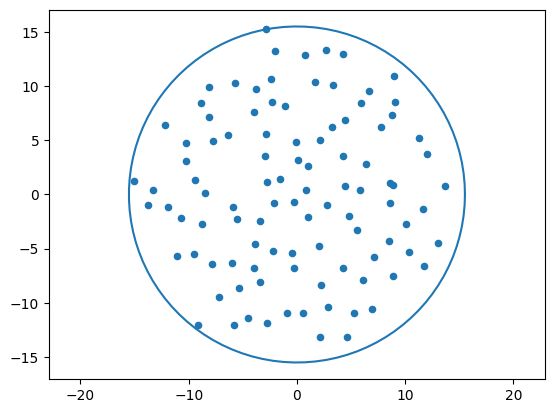

In [1]:
from numpy import matrix, pi, sin, cos, linspace
from numpy.random import normal
from numpy.linalg import eig, eigh
import matplotlib.pylab as plt

N = 100
B = normal(0, 1, (N, N, 2))
A = matrix(B[:, :, 0] + 1j * B[:, :, 1])
Real = A + A.conj()
Hermite = A + A.H
PositiveSemiDefinite = A * A.H
PositiveComponents = abs(A)
Unitary = matrix(eigh(Hermite)[1])

X = A
#X = Real
#X = Hermite
#X = PositiveSemiDefinite
#X = PositiveComponents
#X = Unitary
Lmd = eig(X)[0]
r = max(abs(Lmd))
T = linspace(0, 2 * pi, 100)
plt.axis('equal')
plt.plot(r * cos(T), r * sin(T))
plt.scatter(Lmd.real, Lmd.imag, s=20)

[![A.png](./8.4/thumbnails/thumb_A.png)](./8.4/A.png) A

[![Real.png](./8.4/thumbnails/thumb_Real.png)](./8.4/Real.png) Real

[![Hermite.png](./8.4/thumbnails/thumb_Hermite.png)](./8.4/Hermite.png) Hermite

[![PositiveComponents.png](./8.4/thumbnails/thumb_PositiveComponents.png)](./8.4/PositiveComponents.png) PositiveComponents

[![Unitary.png](./8.4/thumbnails/thumb_Unitary.png)](./8.4/Unitary.png) Unitary

---
**Programs:** [norm.py](./8.4/norm.py)

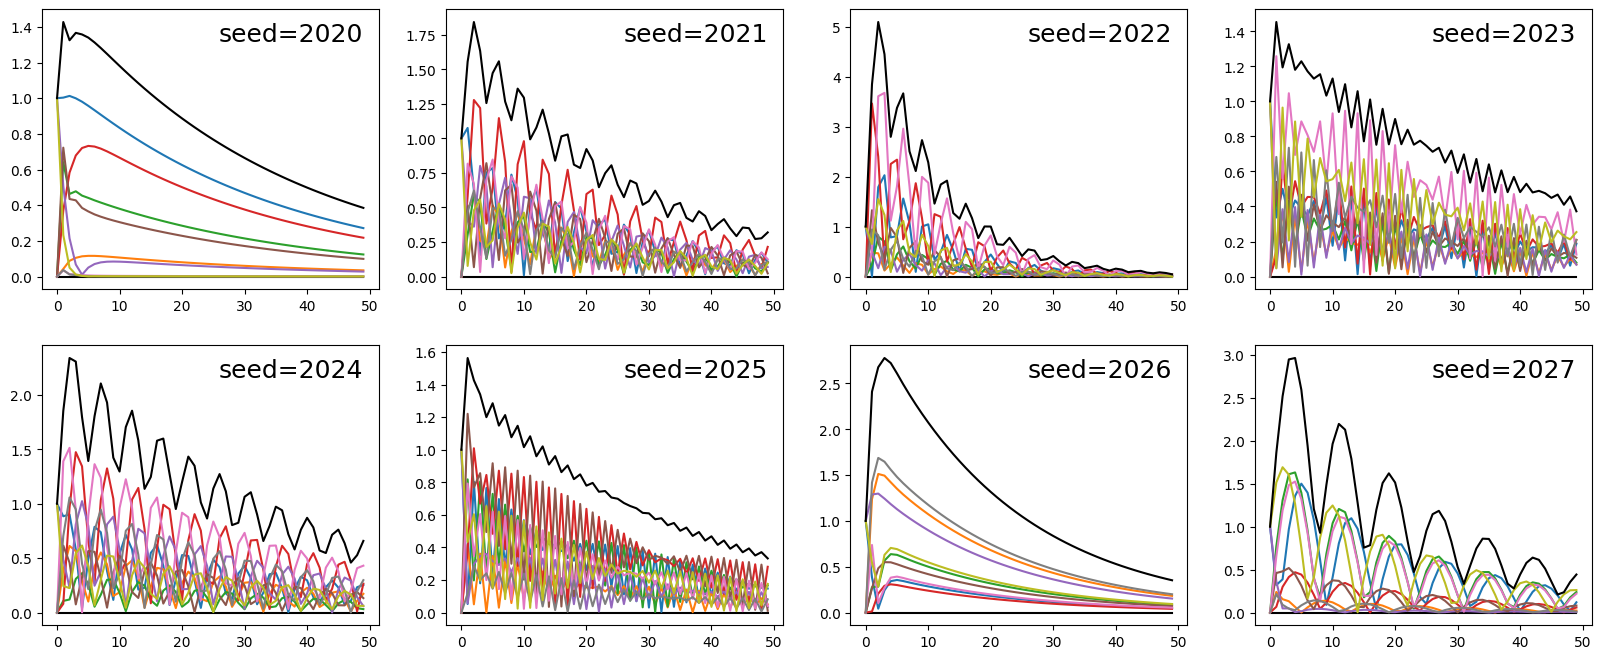

In [1]:
from numpy import matrix
from numpy.linalg import eig, norm
from numpy.random import normal, seed
import matplotlib.pyplot as plt

def power(m, s):
    seed(s)
    A = matrix(normal(0, 2, (m, m)))
    lmd = max(abs(eig(A)[0])) + 0.1
    X = range(50)
    P = [(A / lmd)**n for n in X]
    Y = [norm(B, 2) for B in P]
    plt.plot([X[0], X[-1]], [0, 0], c='k')
    for i in range(m):
        for j in range(m):
            plt.plot(X, [abs(B[i, j]) for B in P])
    plt.plot(X, Y, c='k')
    plt.text(max(X), max(Y), f'seed={s}',
             size=18, ha='right', va='top')


plt.figure(figsize=(20, 8))
n = 241
for s in [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]:
    plt.subplot(n)
    power(3, s)
    n += 1

---
**Program:** [gelfand.py](./8.4/gelfand.py)

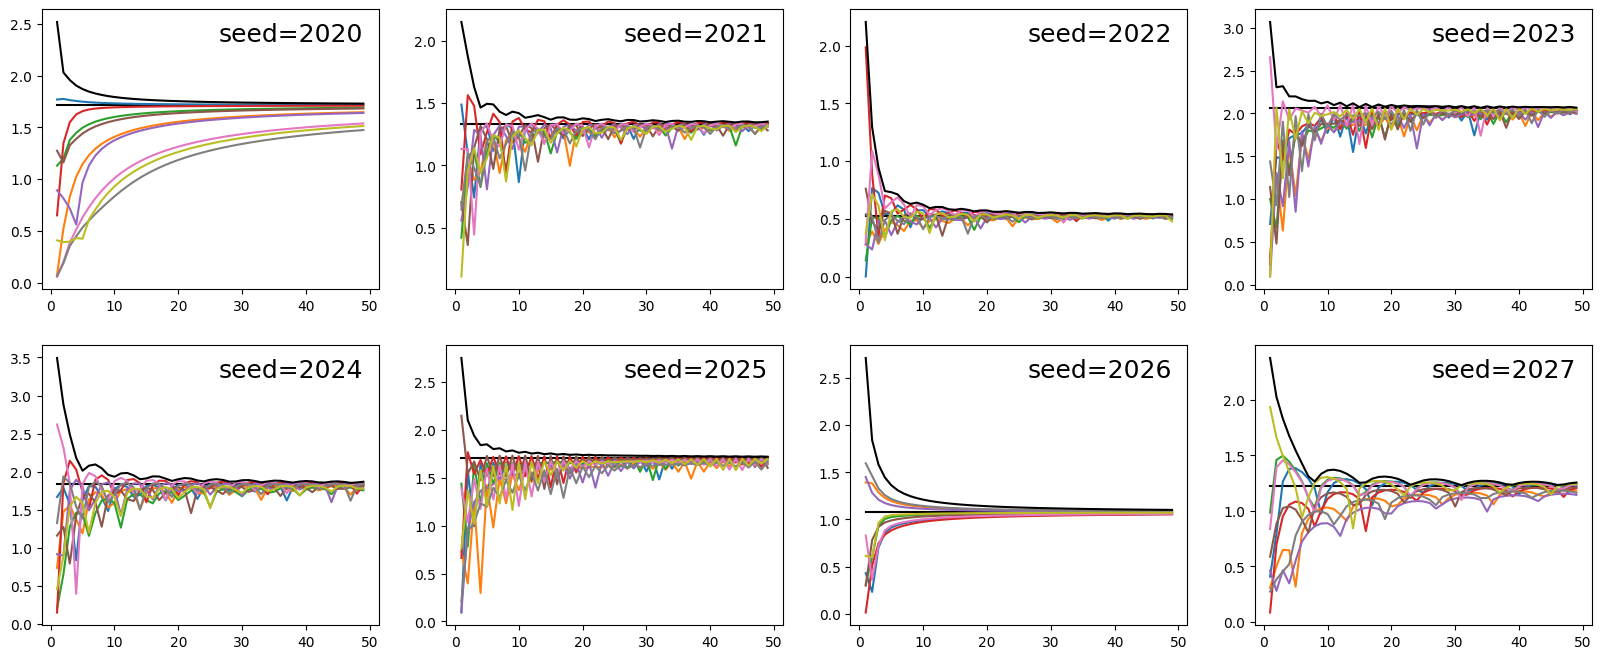

In [1]:
from numpy import matrix
from numpy.linalg import eig, norm
from numpy.random import normal, seed
import matplotlib.pyplot as plt

def gelfand(m, s):
    seed(s)
    A = matrix(normal(0, 1, (m, m)))
    lmd = max(abs(eig(A)[0]))
    X = range(1, 50)
    P = [A**n for n in range(50)]
    Y = [norm(P[n], 2)**(1 / n) for n in X]
    plt.plot([X[0], X[-1]], [lmd, lmd], c='k')
    for i in range(m):
        for j in range(m):
            plt.plot(X, [abs(P[n][i, j])**(1 / n) for n in X])
    plt.plot(X, Y, c='k')
    plt.text(max(X), max(Y), f'seed={s}',
             size=18, ha='right', va='top')

plt.figure(figsize=(20, 8))
n = 241
for s in [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027]:
    plt.subplot(n)
    gelfand(3, s)
    n += 1

---
## 8.5. Perron-Frobenius theorem

Empty